Q1. What is the mathematical formula for a linear SVM?

Ans:- The mathematical formula for SVM are : <math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><semantics><mrow><munder><mrow><mi>min</mi><mo>⁡</mo></mrow><mrow><mi>w</mi><mo separator="true">,</mo><mi>b</mi></mrow></munder><mfrac><mn>1</mn><mn>2</mn></mfrac><mi mathvariant="normal">∣</mi><mi mathvariant="normal">∣</mi><mi>w</mi><mi mathvariant="normal">∣</mi><msup><mi mathvariant="normal">∣</mi><mn>2</mn></msup></mrow><annotation encoding="application/x-tex">\min_{w, b} \frac{1}{2} ||w||^2
</annotation></semantics></math>

Q2. What is the objective function of a linear SVM?

Ans: The objective function of a linear SVM is to find the optimal hyperplane that separates the data into different classes by solving an optimization problem. The optimization problem can be expressed as follows:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><semantics><mrow><munder><mrow><mi>min</mi><mo>⁡</mo></mrow><mrow><mi>w</mi><mo separator="true">,</mo><mi>b</mi></mrow></munder><mfrac><mn>1</mn><mn>2</mn></mfrac><mi mathvariant="normal">∣</mi><mi mathvariant="normal">∣</mi><mi>w</mi><mi mathvariant="normal">∣</mi><msup><mi mathvariant="normal">∣</mi><mn>2</mn></msup></mrow><annotation encoding="application/x-tex">\min_{w, b} \frac{1}{2} ||w||^2
</annotation></semantics></math>

Q3. What is the kernel trick in SVM?

Ans:- The kernel trick is a technique used in support vector machine to solve non-linear classification problems by implicity mapping the input data to a higher dimensional feature space.

Q4. What is the role of support vectors in SVM Explain with example

Ans:- Support vectors play a crucial role in SVM by determining the position and orientation of the decision boundary. They are the data points that are most difficult to classify and have a direct impact on the shape of the descion boundary.

Here’s an example to illustrate the role of support vectors in SVM. Imagine we have a dataset with two classes of data points that are linearly separable. We can use a linear SVM to find the optimal hyperplane that separates the two classes. The hyperplane is chosen such that it maximizes the margin between the support vectors of the two classes. In this case, the support vectors are the data points that lie closest to the hyperplane, and they determine its position and orientation. If we were to remove all other data points and only keep the support vectors, the position of the hyperplane would remain unchanged1.

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?
Q6. SVM Implementation through Iris dataset.

Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.
~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
~ Compute the accuracy of the model on the testing setl
~ Plot the decision boundaries of the trained model using two of the featuresl
~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [4]:
# load the iris dataset
iris = datasets.load_iris()

In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
X = iris.data[:, :2]

In [7]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [8]:
y = iris.target

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# Split the dataset into a training set and a testing set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [11]:
# Train a linear SVM classifier
C = 1.0
svm_classifier = SVC(kernel='linear', C=C)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
# predict labels for the testing point
y_pred = svm_classifier.predict(X_test)

In [13]:
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0,
       0])

In [14]:
accuracy = accuracy_score(y_test, y_pred)

In [17]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


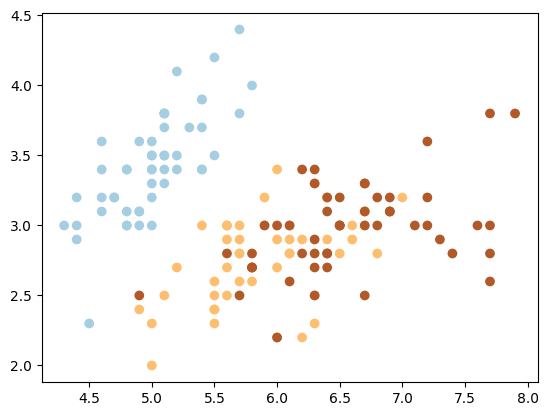

In [19]:
# plot the descion boundaries using the trained model
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [24]:

# create a grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
                     
Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Adjust Z to match the shape of xx and yy
Z = Z.reshape(xx.shape)

ValueError: cannot reshape array of size 30000 into shape (100,100)

TypeError: Shapes of x (100, 100) and z (10000, 3) do not match

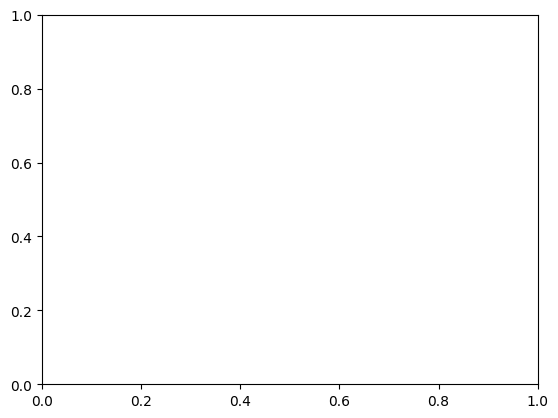

In [23]:
# Plot decision boundary and margins
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, cmap=plt.cm.Paired)
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title('SVM Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()